In [9]:
import pandas as pd
import os
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder

In [10]:
possible_paths = [
    'C:/Users/lenne/OneDrive/Documenten/Master of Statistics and Data Science/2023-2024/Master thesis/Thesis_Sofia_Lennert/new_data',
    'C:/Users/anaso/Desktop/SOFIA MENDES/KU Leuven/Master Thesis/Thesis_Sofia_Lennert/new_data'
]

# Define file names
file = 'merged_data.csv'

# Find full paths to the CSV files
path = next((f'{path}/{file}' for path in possible_paths if os.path.exists(f'{path}/{file}')), None)

In [11]:
data = pd.read_csv(path)
data

,USUBJID,AGE,SEX,RACE,CONTINENT,CESEV,CECONTRT,TOTRELAP,MHCONTRT,MHDIAGN,...,RAND36_M-after,RAND36_M-before,RAND36_P-after,RAND36_P-before,SF12_M-before,SF12_M-wk12,SF12_M-wk24,SF12_P-before,SF12_P-wk12,SF12_P-wk24
0,MSOAC/0649,NaN,F,WHITE,NORTH AMERICA,NaN,NaN,NaN,Y,SPMS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MSOAC/2224,38.0,F,WHITE,EUROPE,NaN,NaN,NaN,NaN,RRMS,...,NaN,NaN,NaN,NaN,0.8,0.7,0.7,0.5,0.5,0.5
2,MSOAC/0576,50.0,F,WHITE,NaN,NaN,NaN,NaN,Y,PPMS,...,0.671429,0.628571,0.531646,0.594937,NaN,NaN,NaN,NaN,NaN,NaN
3,MSOAC/4961,44.0,F,WHITE,NaN,NaN,NaN,NaN,Y,PPMS,...,0.614286,0.614286,0.645570,0.582278,NaN,NaN,NaN,NaN,NaN,NaN
4,MSOAC/5990,52.0,F,WHITE,NaN,NaN,NaN,NaN,Y,PPMS,...,0.742857,0.600000,0.531646,0.506329,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2460,MSOAC/2501,46.0,F,WHITE,NaN,NaN,NaN,12.0,NaN,SPMS,...,0.614286,0.642857,0.588608,0.645570,NaN,NaN,NaN,NaN,NaN,NaN
2461,MSOAC/8672,43.0,F,NaN,NaN,MODERATE,NaN,1.0,NaN,RRMS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2462,MSOAC/5705,30.0,M,NaN,NaN,MILD,NaN,2.0,NaN,RRMS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2463,MSOAC/8255,42.0,M,NaN,NaN,MODERATE,NaN,1.0,NaN,RRMS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Set to 0 because ... (write the explanation)

In [12]:
data['NRELAP'] = data['NRELAP'].fillna(0)

In [13]:
missing_percentage_data = (data.isnull().sum() / len(data)) * 100
missing_data = pd.DataFrame({'Column Name': missing_percentage_data.index, 'Missing Percentage': missing_percentage_data.values})
missing_data = missing_data.sort_values(by='Missing Percentage', ascending=False)
missing_data.head(60)

,Column Name,Missing Percentage
43,BDI_after_1y,93.225152
8,MHCONTRT,88.235294
35,DS_R,87.423935
34,DS_L,87.423935
33,DS,87.423935
21,PASAT_2s-after_2y,85.922921
6,CECONTRT,82.799189
59,SF12_M-wk24,80.527383
62,SF12_P-wk24,80.527383
61,SF12_P-wk12,79.959432


Question from them during meeting: how many rows we have for which the targets are all there (supervised, other rows would be 'semi-supervised') -- note I don't yet use all the targets here because I feel it will be 0 (it's already 154 now using only the most occuring functional tests)

In [17]:
# Specify the list of variables
variables = ['NRELAP', 'CESEV', 'SMSTDY', 'EDSS-2y', 'EDSS-after_2y', 'NHPT-2y', 'NHPT-after_2y', 'T25FW-2y', 'T25FW-after_2y']

# Check for rows where there are no missing values in any of the specified variables
rows_with_no_missing_values = data.dropna(subset=variables, how='any')

# Display the number of rows with no missing values
print("Number of rows with no missing values in any specified column:", len(rows_with_no_missing_values))

Number of rows with no missing values in any specified column: 154


try to use the package Robbe set (these plots are not informative so we can remove later)

<Axes: >

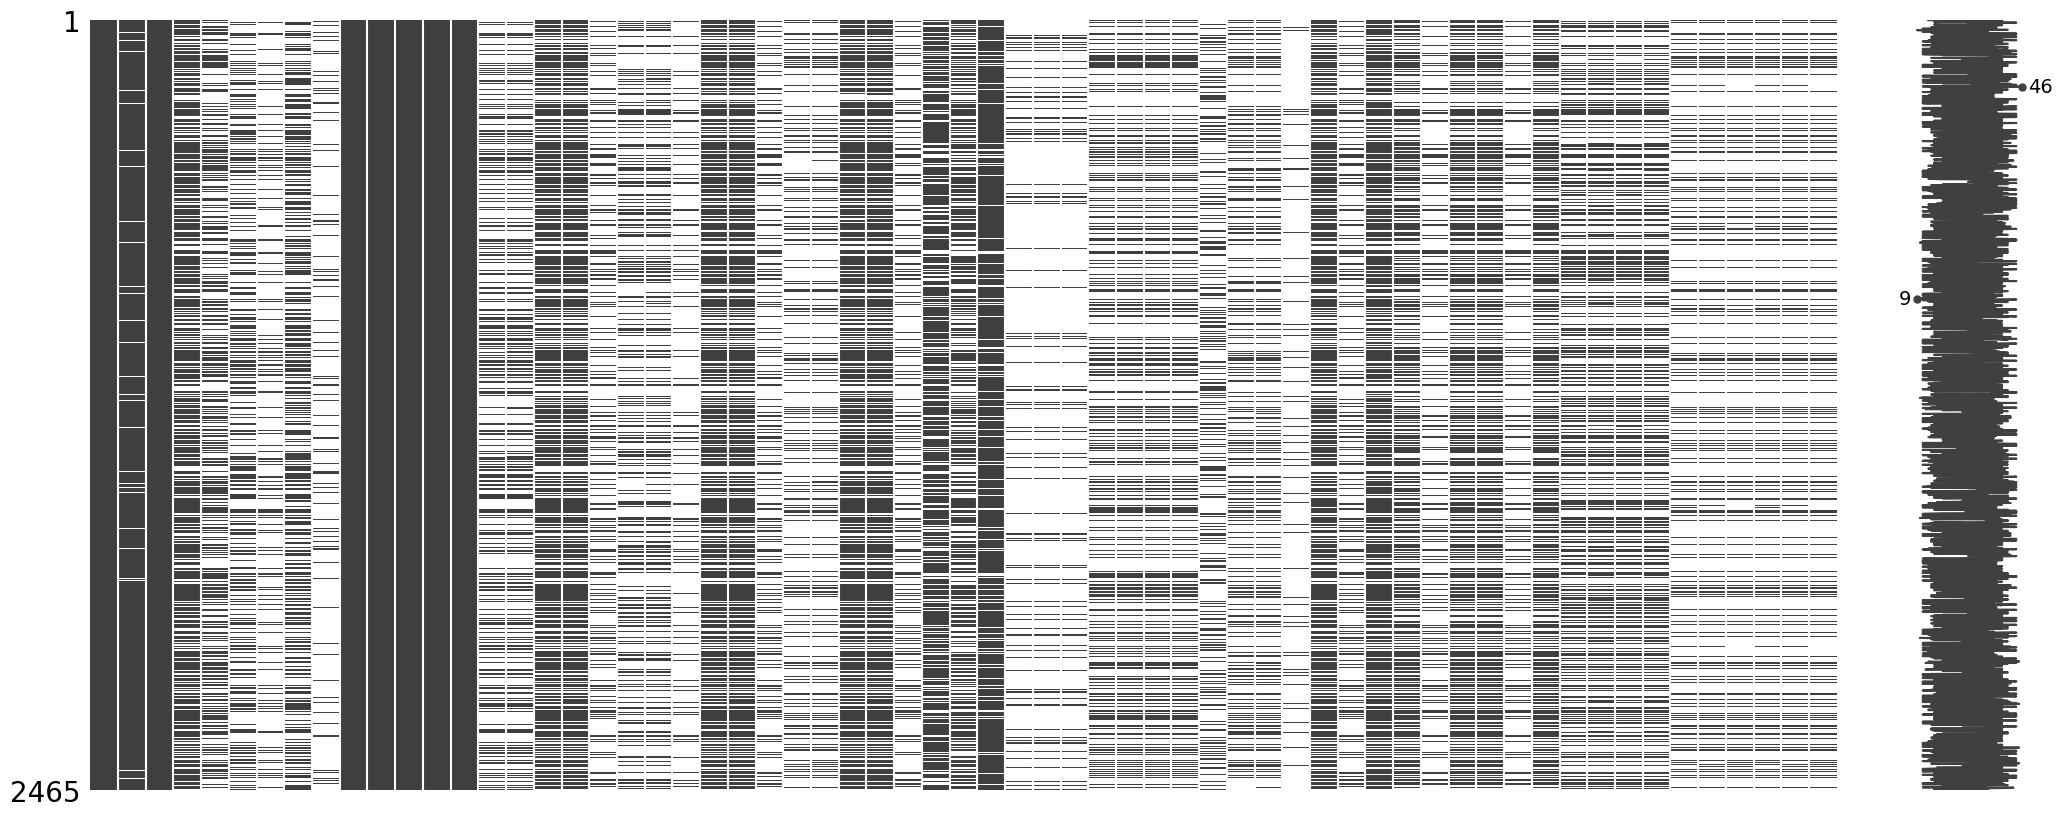

In [6]:
msno.matrix(data)

<Axes: >

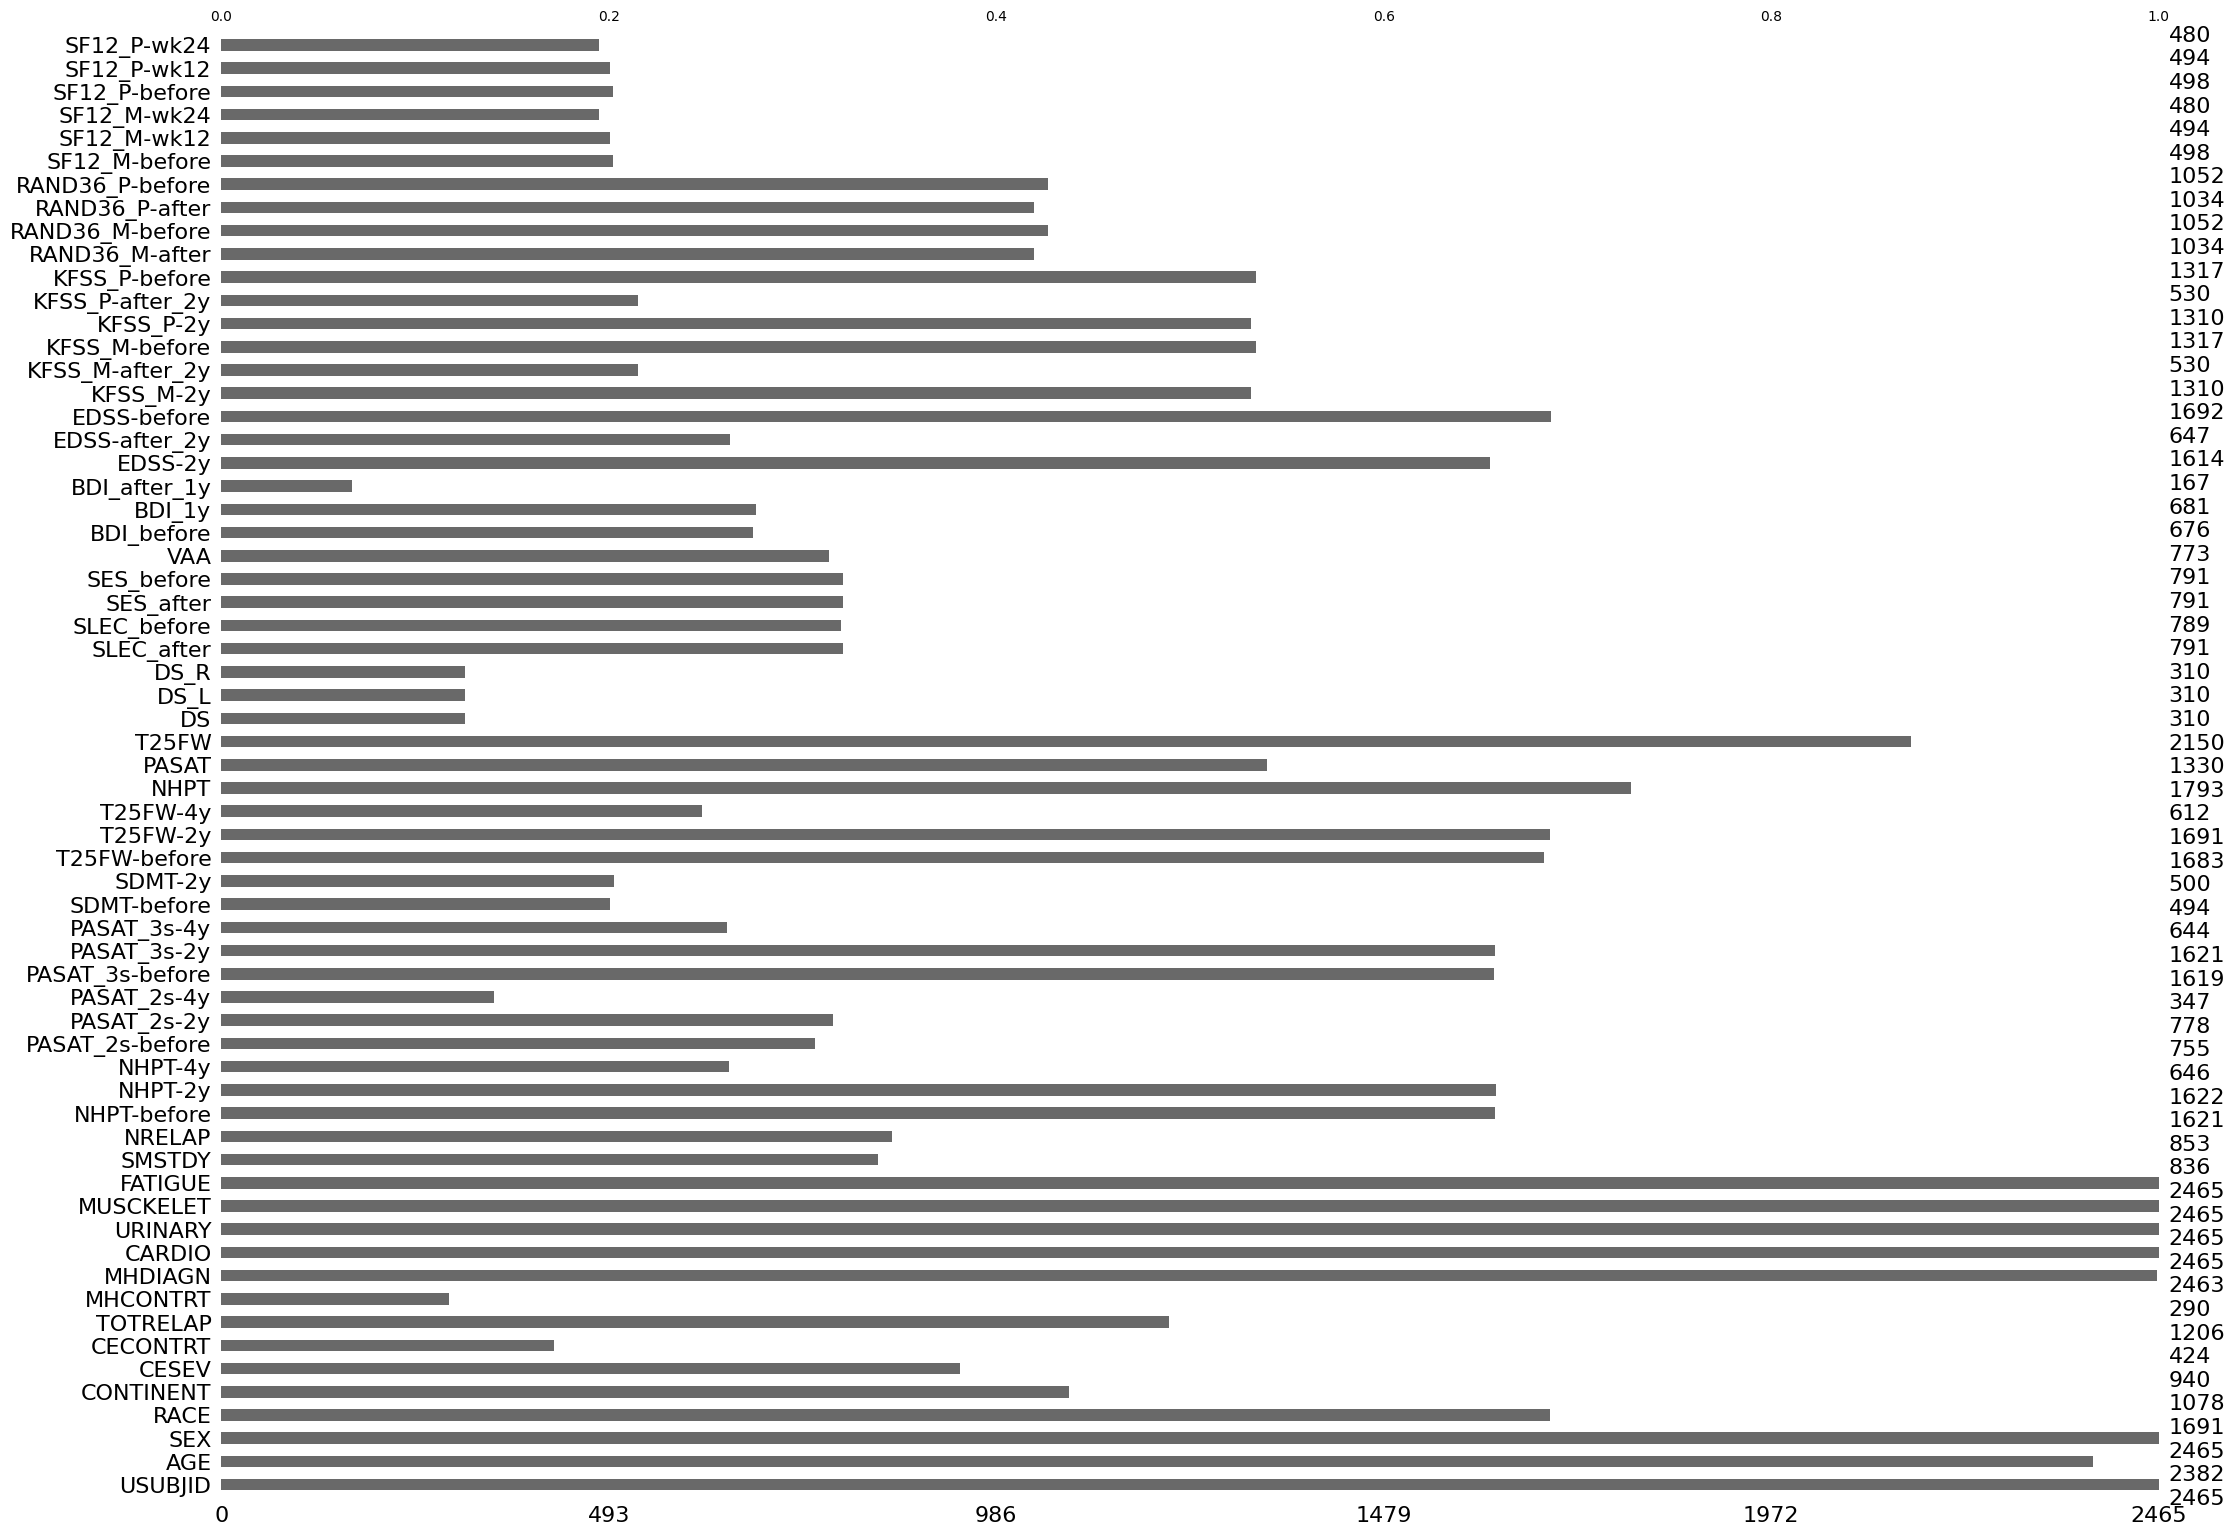

In [7]:
msno.bar(data)

<Axes: >

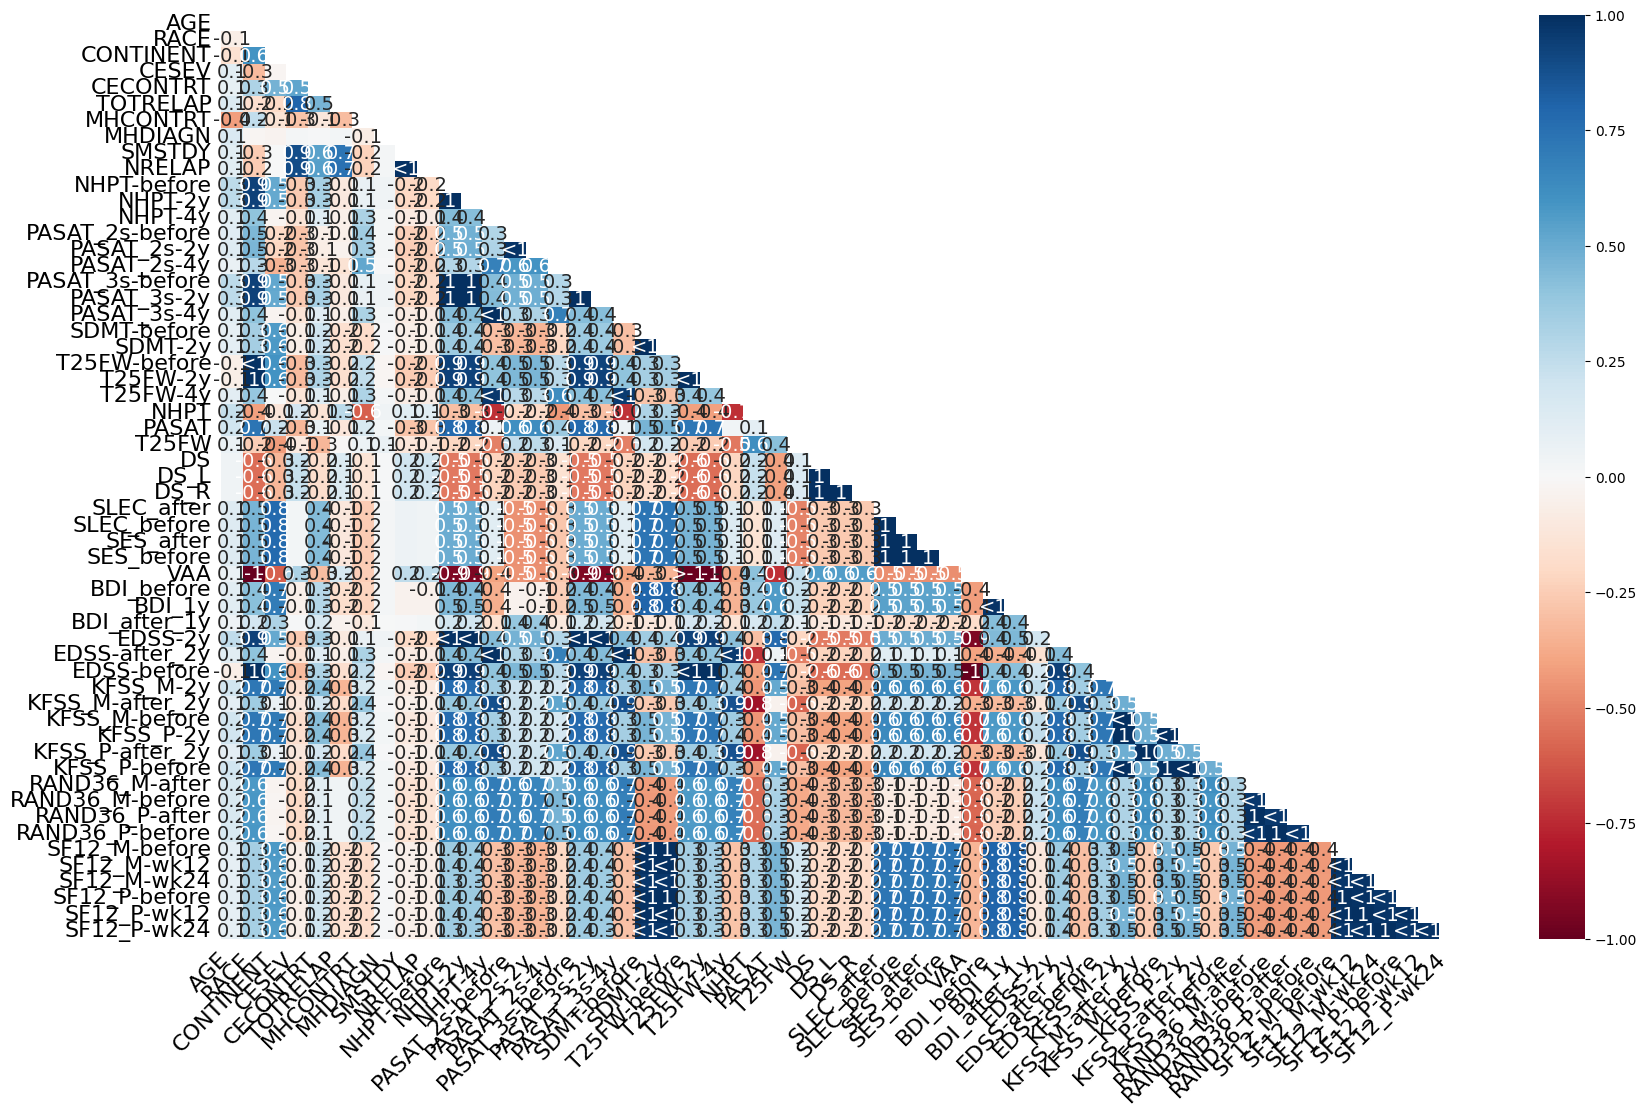

In [8]:
msno.heatmap(data)

Idea 1: use SMSTDY as target

beware of only using predictors that are available at study start [data leakage]

create pipeline
- column drop
- one hot encoding
- standardization
- rf

other possible targets:
- severeness of relapse (cat)
- test outcomes (num)
- EDSS (num)
- number of relapses (num or cat if bins)

can we use data from 2y or more after study start or is it data leakage?

In [ ]:
# one-hot encoding
#binning NMIDS

In [ ]:
#Functions for the pipeline

def drop_columns(df, columns_to_keep):
    columns_to_drop = set(df.columns) - set(columns_to_keep)
    return df.drop(columns=columns_to_drop)

In [ ]:
pipeline = Pipeline(steps=[
    ('column_dropper',
     drop_columns(columns_to_drop=[  ])
     ),
    ('custom_encoder',
     CustomEncoder(
        columns=['#object_id', 'day_period', 'month', 'weekday'])
     ),
    ('pca',
     PCATransformer(
        n_components=7,
        columns=[
            'lamax', 'laeq', 'lceq', 'lcpeak',
            'lamax_shift_t-_1', 'laeq_shift_t-_1', 'lceq_shift_t-_1',
            'lcpeak_shift_t-_1', 'lamax_shift_t-_2', 'laeq_shift_t-_2',
            'lceq_shift_t-_2', 'lcpeak_shift_t-_2', 'lamax_shift_t-_3',
            'laeq_shift_t-_3', 'lceq_shift_t-_3', 'lcpeak_shift_t-_3',
            'lamax_shift_t-_4', 'laeq_shift_t-_4', 'lceq_shift_t-_4',
            'lcpeak_shift_t-_4', 'lamax_shift_t-_5', 'laeq_shift_t-_5',
            'lceq_shift_t-_5', 'lcpeak_shift_t-_5'
        ])
     ),
     ('randomForest', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

CREATE PIPELINE

In [ ]:
# Split training and test data randomly
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)
print(len(X_train), len(y_train), len(X_test), len(y_test))

### Random Forest